In [ ]:
import pandas as pd
import os
import re
import csv
import numpy as np

In [ ]:
def clean(line):
    # line = line.strip().replace("newline_char", "||||||||||||||||||||||||||||")
    # line = line.strip().replace("newline_char", " ")
    line = line.strip()
    line = line.replace("( opens in new window )", "")
    line = line.replace("click to email this to a friend", "")
    line = line.replace("lick to share on whatsapp", "")
    line = line.replace("click to share on facebook", "")
    line = line.replace("share on facebook", "")
    line = line.replace("click to share on twitter", "")
    line = line.replace("click to share on pinterest", "")
    line = line.replace("click to share on tumblr", "")
    line = line.replace("click to share on google+", "")
    line = line.replace("feel free to share these resources in your social "
                        "media networks , websites and other platforms", "")
    line = line.replace("share share tweet link", "")
    line = line.replace("e-mail article print share", "")
    line = line.replace("read or share this story :", "")
    line = line.replace("share the map view in e-mail by clicking the share "
                        "button and copying the link url .     embed the map "
                        "on your website or blog by getting a snippet of html "
                        "code from the share button .     if you wish to "
                        "provide feedback or comments on the map , or if "
                        "you are aware of map layers or other "
                        "datasets that you would like to see included on our maps , "
                        "please submit them for our evaluation using this this form .", "")
    line = line.replace("share this article share tweet post email", "")
    line = line.replace("skip in skip x embed x share close", "")
    line = line.replace("share tweet pin email", "")
    line = line.replace("share on twitter", "")
    line = line.replace("feel free to weigh-in yourself , via"
                        "the comments section . and while you ’ "
                        "re here , why don ’ t you sign up to "
                        "follow us on twitter us on twitter .", "")
    line = line.replace("follow us on facebook , twitter , instagram and youtube", "")
    line = line.replace("follow us on twitter", "")
    line = line.replace("follow us on facebook", "")
    line = line.replace("play facebook twitter google plus embed", "")
    line = line.replace("play facebook twitter embed", "")
    line = line.replace("enlarge icon pinterest icon close icon", "")
    line = line.replace("follow on twitter", "")
    line = line.replace("autoplay autoplay copy this code to your website or blog", "")
    return line

In [ ]:
def clean_str(s):
    s = s.lower()
    s = s.strip()
    s = s.replace('<unk>','')
    s = s.replace('`', '')
    # s = s.replace('.', '\n')
    s = s.replace(',', '')
    s = s.replace(';', '')
    s = s.replace('\'', '')
    s = s.replace('\"', '')
    s = s.replace('(', '')
    s = s.replace(')', '')
    s = s.replace('-', ' ')
    s = s.replace('<p>', '')
    s = s.replace('</p>', '')
    s = s.replace('<t>', '')
    s = s.replace('</t>', '')
    s = s.replace('[!@#$]', '')
    s = s.replace('– ', '')
    s = s.replace('  ', ' ')
    return s

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def preprocess_text(txt, stopwords, lem):
    lst_txt = txt.split()
    txt = " ".join([lem.lemmatize(word) for word in lst_txt if word not in stopwords])
    return txt

In [ ]:
# download train.src
!gdown 1ScGIcY_TcaIY57q9xdCQmi2EVAbmjHed 

Downloading...
From: https://drive.google.com/uc?id=1ScGIcY_TcaIY57q9xdCQmi2EVAbmjHed
To: /content/train.src
100% 550M/550M [00:07<00:00, 76.0MB/s]


In [ ]:
# download train.tgt
!gdown 1iP2yUNI4-wkJvCMl-RsKBK9rJkEfnZdM

Downloading...
From: https://drive.google.com/uc?id=1iP2yUNI4-wkJvCMl-RsKBK9rJkEfnZdM
To: /content/train.tgt
100% 58.8M/58.8M [00:01<00:00, 50.1MB/s]


In [ ]:
# download test.src
# !gdown 1_eixB51Mrgyttq-Ke4hI5czcggTBhvXf

In [ ]:
# download test.tgt
# !gdown 1Y56DFe5FROz9ikkYtEEAGcPBevV1IZa6

In [ ]:
def get_data(src):
  data = []



  #get articles
  with open('./' + src + '.src') as file:
      raw = file.read()
      raw = clean(raw)
      
      data = [{'articles': list(filter(str.strip, clean_str(data).split('|||||')))} for data in raw.split('\n')] # topics = [topic1, topic2, topic3, ...]
      
      for topic in data:
          topic['paragraphs'] = [list(filter(str.strip, article.split("newline_char"))) for article in topic["articles"]]
          topic['articles'] = [preprocess_text(article.replace("newline_char", '. '), sws, lem)  for article in topic['articles']]
      file.close()

  print('article finish')

  #get summarys
  with open('./' + src + '.tgt') as file:
      raw = file.read()
      raw = clean_str(raw)
      
      summaries = raw.split('\n')
      
      for topic, summary in zip(data, summaries):
          topic['summary'] = preprocess_text(summary, sws, lem)
      
      file.close()
  print('summary finish')

  return data

In [ ]:
# list of dictionary
# each topic is dict that has following keys: 
# 'articles': list[str]
# 'paragraphs': list[list[str]] // each article is parsed into paragraphs
# 'summary': str
trains = get_data('train')
# tests = get_data('test')

In [ ]:
import pprint as pp
print("---------train-----------")
pp.pprint(trains[0])
print("---------test-----------")
# pp.pprint(tests[0])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install datasets
!pip install rouge_score

In [ ]:
from datasets import load_metric
metric = load_metric("rouge")

def calc_rouge_scores(candidates, references):
    result = metric.compute(predictions=candidates, references=references, use_stemmer=True)
    result = {key: round(value.mid.fmeasure * 100, 1) for key, value in result.items()}
    return result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  


In [ ]:
# data preprocessing for seq2seqa
stopwords = nltk.corpus.stopwords.words("english")

train_text = [topic['articles'][0] for topic in trains]
train_summary = [topic['summary'] for topic in trains]

# test_text = [topic['articles'][0]s) for topic in tests]
# test_summary = [topic['summary'] for topic in tests]

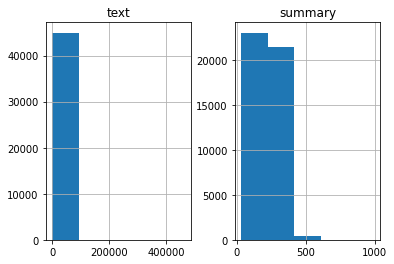

In [ ]:
# determine the maximum permissible sequence lengths
text = pd.Series(train_text)
summary = pd.Series(train_summary)

import matplotlib.pyplot as plt

text_count = []
summary_count = []

for sent in text:
    text_count.append(len(sent.split()))
    
for sent in summary:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame() 

graph_df['text'] = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 5)
plt.show()

In [ ]:
# Check how much % of text have 0-2000 words
cnt = 0
for i in text:
    if len(i.split()) <= 1000:
        cnt = cnt + 1
print(cnt / len(text))

0.9482344569954638


In [ ]:
# Check how much % of summary have 0-400 words
cnt = 0
for i in summary:
    if len(i.split()) <= 200:
        cnt = cnt + 1
print(cnt / len(summary))

0.9499243974028284


In [ ]:
max_text_len = 1000
max_summary_len = 200

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


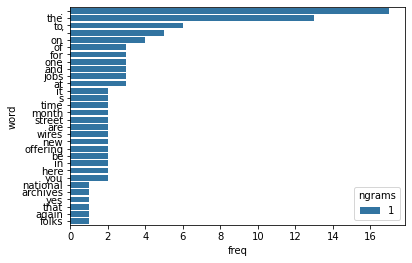

In [ ]:
import seaborn as sns
lst_tokens = nltk.tokenize.word_tokenize(train_text[0])
ngrams = [1]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
   dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
   dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
   dtf_n["ngrams"] = n
   dtf_freq = dtf_freq.append(dtf_n)
   dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
   dtf_freq_X= dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
## plot
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


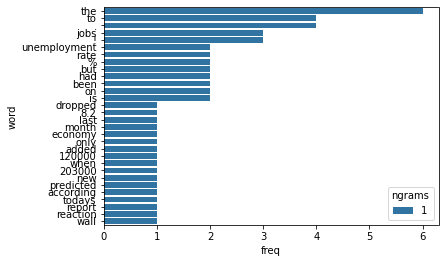

In [ ]:
lst_tokens = nltk.tokenize.word_tokenize(train_summary[0])
ngrams = [1]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
   dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
   dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
   dtf_n["ngrams"] = n
   dtf_freq = dtf_freq.append(dtf_n)
   dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
   dtf_freq_Y= dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
## plot
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()

In [ ]:
thres = 5 #<-- min frequency
X_top_words = len(dtf_freq_X[dtf_freq_X["freq"]>thres])
y_top_words = len(dtf_freq_y[dtf_freq_y["freq"]>thres])

In [ ]:
# Add sostok and eostok
post_pre['summary'] = post_pre['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_pre.head(2)

,text,summary
0,national archive yes time folk first friday mo...,sostok unemployment rate dropped 82 last month...
1,los angeles ap first interview since nba banne...,sostok shelly sterling plan eventually divorce...


In [ ]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(post_pre["text"]),
    np.array(post_pre["summary"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [ ]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  69.61588260681916


In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 58433


In [ ]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 71.784171128256
Size of vocabulary in Y = 34415


In [ ]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []

for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1000, 200)    11686600    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 1000, 300),  601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=15,
    callbacks=[es],
    batch_size=32,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

NameError: ignored

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [ ]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [ ]:
for i in range(0, 19):
    print ('Review:', seq2text(x_tr[i]))
    print ('Original summary:', seq2summary(y_tr[i]))
    print ('Predicted summary:', decode_sequence(x_tr[i].reshape(1,
           max_text_len)))
    print '\n'